In [1]:
!pip install yfinance beautifulsoup4 requests pandas matplotlib

In [2]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()  # Display first five rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
print("Fetching Tesla revenue data...")

# Step 1: Fetch the webpage content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text

# Step 2: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Locate the table containing revenue data
tables = soup.find_all("table")

# Identify the correct table (search for "Tesla Quarterly Revenue" in HTML)
tesla_revenue = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]  # Extract the table
        break

# Ensure the table was found
if tesla_revenue is None:
    raise ValueError("Tesla revenue data table not found. The webpage structure may have changed.")

# Step 4: Clean the extracted data
tesla_revenue.columns = ["Date", "Revenue"]  # Rename columns

# Remove non-numeric values like '$' signs and commas
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({"\$": "", ",": ""}, regex=True)

# Convert Revenue column to numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

# Drop NaN values
tesla_revenue.dropna(inplace=True)

# Convert Date column to datetime format
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Step 5: Display the cleaned dataset
print("Last five rows of Tesla revenue data:")
tesla_revenue.tail()

Fetching Tesla revenue data...
Last five rows of Tesla revenue data:


,Date,Revenue
57,2010-09-30,31.0
58,2010-06-30,28.0
59,2010-03-31,21.0
61,2009-09-30,46.0
62,2009-06-30,27.0


In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()  # Display first five rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

print("Fetching GameStop revenue data...")

# Step 1: Fetch the webpage content
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text

# Step 2: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Locate the table containing revenue data
tables = soup.find_all("table")

# Identify the correct table (search for "GameStop Quarterly Revenue" in HTML)
gme_revenue = None
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]  # Extract the table
        break

# Ensure the table was found
if gme_revenue is None:
    raise ValueError("GameStop revenue data table not found. The webpage structure may have changed.")

# Step 4: Clean the extracted data
gme_revenue.columns = ["Date", "Revenue"]  # Rename columns

# Remove non-numeric values like '$' signs and commas
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({"\$": "", ",": ""}, regex=True)

# Convert Revenue column to numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Drop NaN values
gme_revenue.dropna(inplace=True)

# Convert Date column to datetime format
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Step 5: Display the cleaned dataset
print("Last five rows of GameStop revenue data:")
gme_revenue.tail()

Fetching GameStop revenue data...
Last five rows of GameStop revenue data:


,Date,Revenue
59,2010-01-31,3524
60,2009-10-31,1835
61,2009-07-31,1739
62,2009-04-30,1981
63,2009-01-31,3492


In [10]:
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label="Closing Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

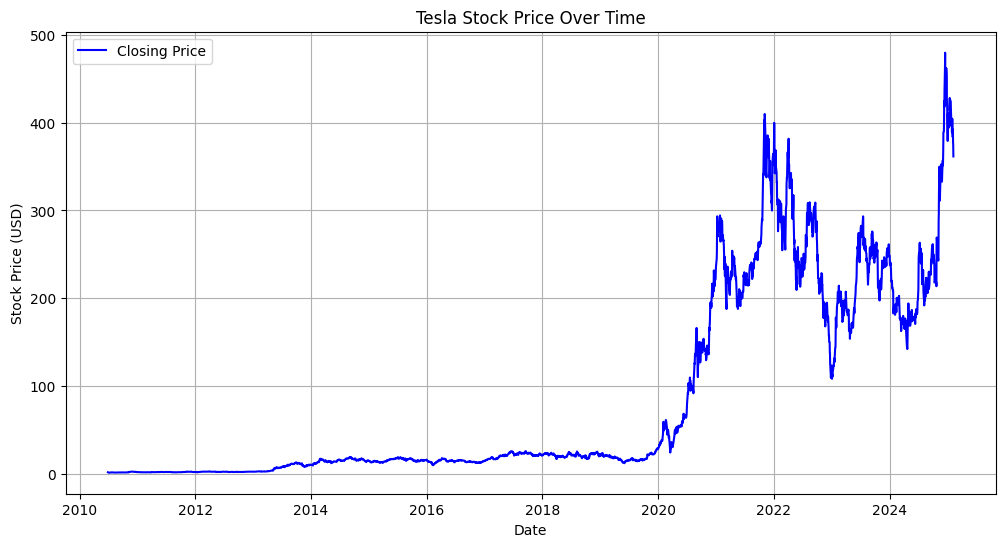

In [11]:
make_graph(tesla_data, "Tesla Stock Price Over Time")

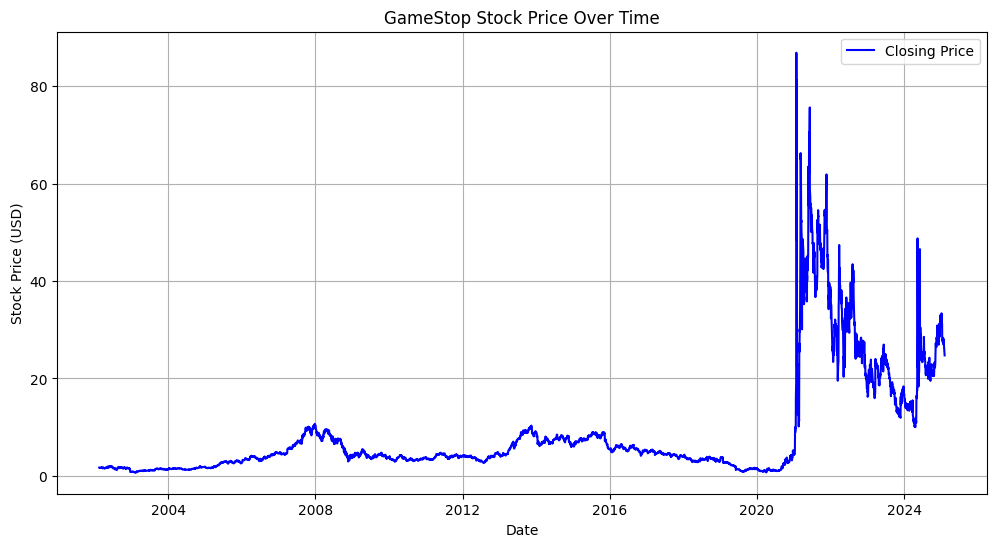

In [12]:
make_graph(gme_data, "GameStop Stock Price Over Time")

## Author
Anand Rishabh Sanjeev